In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

ROWS_PER_FRAME = 543  # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
interpreter = tf.lite.Interpreter("./model.tflite")
found_signatures = list(interpreter.get_signature_list().keys())
prediction_fn = interpreter.get_signature_runner("serving_default")

# output = prediction_fn(inputs=demo_raw_data)
# sign = output['outputs'].argmax()

In [ ]:
train=pd.read_csv('./input/asl-signs/train.csv')
train['sign_ord'] = train['sign'].astype('category').cat.codes

# Dictionaries to translate sign <-> ordinal encoded sign
SIGN2ORD = train[['sign', 'sign_ord']].set_index('sign').squeeze().to_dict()
ORD2SIGN = train[['sign_ord', 'sign']].set_index('sign_ord').squeeze().to_dict()
pq_file='./input/asl-signs/train_landmark_files/16069/695046.parquet'
xyz_np=load_relevant_data_subset(pq_file)
prediction=prediction_fn(inputs=xyz_np)
sign=prediction['outputs'].argmax()


In [ ]:
# ORD2SIGN[sign]

'mad'

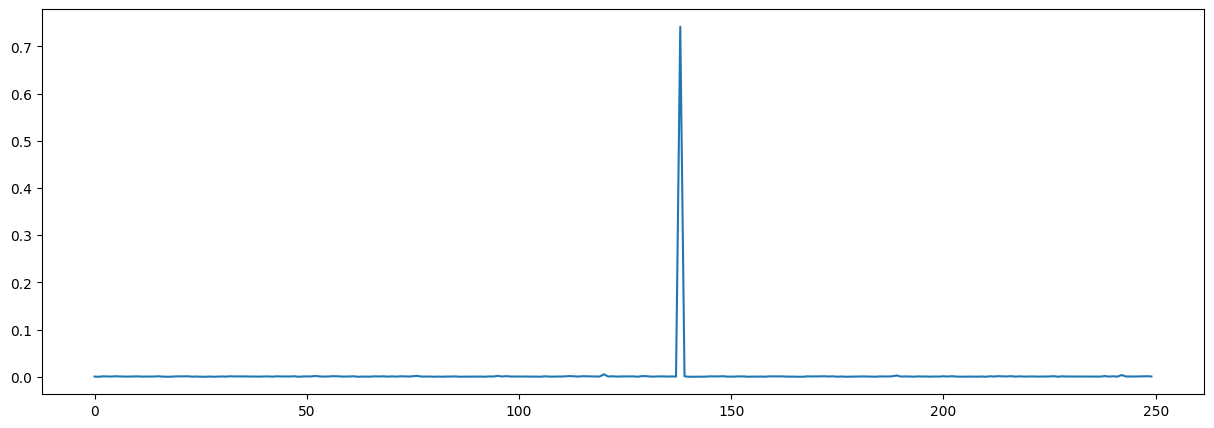

In [ ]:
pd.Series(prediction['outputs']).plot(figsize=(15,5))
plt.show()